# Task 1

In the beginning, Installing NumPy and Pandas libraries would be a must in order to begin with this assignment:

In [1]:
# pip install numpy

In [2]:
# pip install pandas

In [3]:
import numpy as np
import pandas as pd
import datetime
import requests
import json
from pyarrow import DictionaryValue

* Get every 31st day starting from 20th June 2022 to 24th December 2022. For automated solution:

In [4]:
selected_dates = pd.date_range(start='2022-06-20', end='2022-12-24', freq='31D')
display(selected_dates)

DatetimeIndex(['2022-06-20', '2022-07-21', '2022-08-21', '2022-09-21',
               '2022-10-22', '2022-11-22', '2022-12-23'],
              dtype='datetime64[ns]', freq='31D')

*Now we have six dates between the specified range and as we can see the type, they formed in a datetime format as they are dates*

* Look up the documentation of pandas's date_range and get these datetime values, then turn them into strings matching the format YYYY-MM-DD.

In [5]:
# astype(str) will help us to convert datetime format data to strings
string_dates = selected_dates.astype(str)
display(string_dates)

Index(['2022-06-20', '2022-07-21', '2022-08-21', '2022-09-21', '2022-10-22',
       '2022-11-22', '2022-12-23'],
      dtype='object')

* Look up the documentation of the sunrise-sunset api under https://sunrise-sunset.org/api, and use it to get all the data from the API for these days for the latitude 47.5620815 and longitude 19.0516735:



*we use this api url for getting every and each sunset/sunrise information about specified dates. we put them in a list as a json response format file and in addition, the status for our responses is okay.*

In [6]:
sunset_list = []
for dates in string_dates:
  document_url = "https://api.sunrise-sunset.org/json?lat=47.5620815&lng=19.0516735&date="f"{dates}"
  response = requests.get(document_url)
  api_result = response.json()
  sunset_list.append(api_result["results"])
print(sunset_list)  
print("status code: ", response.status_code)

[{'sunrise': '2:44:04 AM', 'sunset': '6:46:40 PM', 'solar_noon': '10:45:22 AM', 'day_length': '16:02:36', 'civil_twilight_begin': '2:05:21 AM', 'civil_twilight_end': '7:25:23 PM', 'nautical_twilight_begin': '1:09:03 AM', 'nautical_twilight_end': '8:21:41 PM', 'astronomical_twilight_begin': '11:38:36 PM', 'astronomical_twilight_end': '9:52:08 PM'}, {'sunrise': '3:06:28 AM', 'sunset': '6:34:00 PM', 'solar_noon': '10:50:14 AM', 'day_length': '15:27:32', 'civil_twilight_begin': '2:30:32 AM', 'civil_twilight_end': '7:09:56 PM', 'nautical_twilight_begin': '1:40:40 AM', 'nautical_twilight_end': '7:59:48 PM', 'astronomical_twilight_begin': '12:35:44 AM', 'astronomical_twilight_end': '9:04:43 PM'}, {'sunrise': '3:46:09 AM', 'sunset': '5:47:45 PM', 'solar_noon': '10:46:57 AM', 'day_length': '14:01:36', 'civil_twilight_begin': '3:14:45 AM', 'civil_twilight_end': '6:19:10 PM', 'nautical_twilight_begin': '2:33:58 AM', 'nautical_twilight_end': '6:59:56 PM', 'astronomical_twilight_begin': '1:48:47 AM

* Create a dataframe from the results, whose index labels are the dates. The name of the index should be 'date'. Display the dataframe.

In [7]:
np.random.seed(0)
# create an array of the specified dates from string dates list
# renamed the first column as index named "dates" with values of sunset_list
df = pd.DataFrame(sunset_list, index=string_dates).rename_axis("dates")
display(df)

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
dates,,,,,,,,,,
2022-06-20,2:44:04 AM,6:46:40 PM,10:45:22 AM,16:02:36,2:05:21 AM,7:25:23 PM,1:09:03 AM,8:21:41 PM,11:38:36 PM,9:52:08 PM
2022-07-21,3:06:28 AM,6:34:00 PM,10:50:14 AM,15:27:32,2:30:32 AM,7:09:56 PM,1:40:40 AM,7:59:48 PM,12:35:44 AM,9:04:43 PM
2022-08-21,3:46:09 AM,5:47:45 PM,10:46:57 AM,14:01:36,3:14:45 AM,6:19:10 PM,2:33:58 AM,6:59:56 PM,1:48:47 AM,7:45:07 PM
2022-09-21,4:27:39 AM,4:46:06 PM,10:36:53 AM,12:18:27,3:58:29 AM,5:15:16 PM,3:22:14 AM,5:51:31 PM,2:44:48 AM,6:28:57 PM
2022-10-22,5:11:09 AM,3:45:23 PM,10:28:16 AM,10:34:14,4:41:23 AM,4:15:09 PM,4:05:33 AM,4:50:59 PM,3:29:58 AM,5:26:34 PM
2022-11-22,5:57:05 AM,3:02:41 PM,10:29:53 AM,09:05:36,5:24:40 AM,3:35:06 PM,4:46:45 AM,4:13:01 PM,4:10:08 AM,4:49:38 PM
2022-12-23,6:27:56 AM,2:57:42 PM,10:42:49 AM,08:29:46,5:53:52 AM,3:31:46 PM,5:14:34 AM,4:11:04 PM,4:37:02 AM,4:48:35 PM


* What, if anything, can you conclude from quickly looking at the solar_noon and day_length columns and the values of the index? You can answer in a markdown cell.

*we created a new sub-dataframe for describing the columns and the values of the index so it would be easier to conclude them:*

In [8]:
df1 = df[["solar_noon", "day_length"]]
display(df1)

,solar_noon,day_length
dates,,
2022-06-20,10:45:22 AM,16:02:36
2022-07-21,10:50:14 AM,15:27:32
2022-08-21,10:46:57 AM,14:01:36
2022-09-21,10:36:53 AM,12:18:27
2022-10-22,10:28:16 AM,10:34:14
2022-11-22,10:29:53 AM,09:05:36
2022-12-23,10:42:49 AM,08:29:46


*We used plot figures for comparing the columns as following:*

'08:29:46'

'16:02:36'

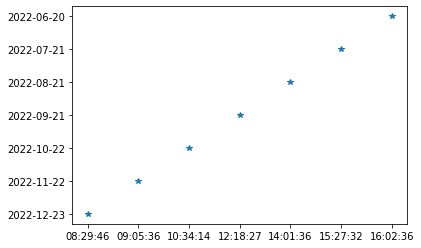

In [84]:
import matplotlib.pyplot as plt

display(df1["day_length"].min(), df1["day_length"].max())
sorted_df1 = df1.sort_values("day_length", ascending=True)

plt.plot(sorted_df1['day_length'],sorted_df1.index, '*')


*As we are able to observe, the more we go forward in the dates, the shorter the days are going to be.*

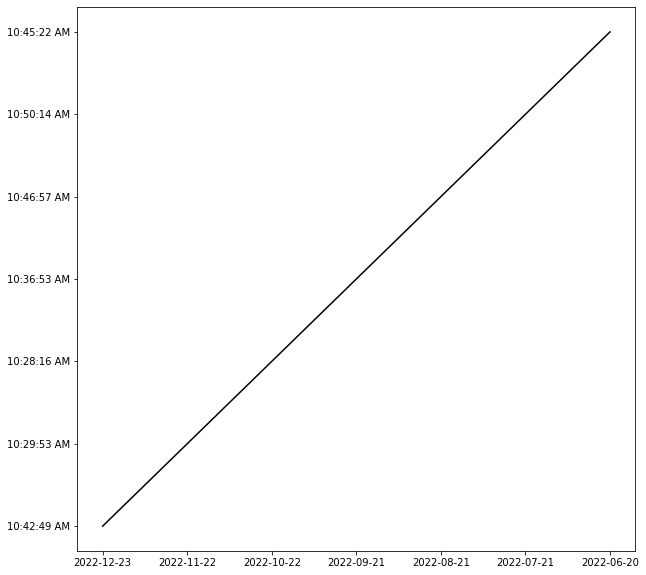

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(sorted_df1.index,
        sorted_df1['solar_noon'],
        color='Black')
plt.show()


*Also we see that when we are going through the year to first of December, we are facing sooner solar noon in the sky.*

# Task 2 - 1

* Turn the "solar_noon" column into datetime type. [link text](https://)Pay attention to getting the correct date (incl. year, month, day).

In [11]:
# Using the dataframe index to avoid getting current datetime
df['solar_noon'] = df.index +" "+df["solar_noon"]
df.head()

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
dates,,,,,,,,,,
2022-06-20,2:44:04 AM,6:46:40 PM,2022-06-20 10:45:22 AM,16:02:36,2:05:21 AM,7:25:23 PM,1:09:03 AM,8:21:41 PM,11:38:36 PM,9:52:08 PM
2022-07-21,3:06:28 AM,6:34:00 PM,2022-07-21 10:50:14 AM,15:27:32,2:30:32 AM,7:09:56 PM,1:40:40 AM,7:59:48 PM,12:35:44 AM,9:04:43 PM
2022-08-21,3:46:09 AM,5:47:45 PM,2022-08-21 10:46:57 AM,14:01:36,3:14:45 AM,6:19:10 PM,2:33:58 AM,6:59:56 PM,1:48:47 AM,7:45:07 PM
2022-09-21,4:27:39 AM,4:46:06 PM,2022-09-21 10:36:53 AM,12:18:27,3:58:29 AM,5:15:16 PM,3:22:14 AM,5:51:31 PM,2:44:48 AM,6:28:57 PM
2022-10-22,5:11:09 AM,3:45:23 PM,2022-10-22 10:28:16 AM,10:34:14,4:41:23 AM,4:15:09 PM,4:05:33 AM,4:50:59 PM,3:29:58 AM,5:26:34 PM


*Then change the solar_noon column into the datetime format. As it is visible in the table info, Dtype changed to datetime format.*

In [12]:

df["solar_noon"] = pd.to_datetime(df["solar_noon"])
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2022-06-20 to 2022-12-23
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sunrise                      7 non-null      object        
 1   sunset                       7 non-null      object        
 2   solar_noon                   7 non-null      datetime64[ns]
 3   day_length                   7 non-null      object        
 4   civil_twilight_begin         7 non-null      object        
 5   civil_twilight_end           7 non-null      object        
 6   nautical_twilight_begin      7 non-null      object        
 7   nautical_twilight_end        7 non-null      object        
 8   astronomical_twilight_begin  7 non-null      object        
 9   astronomical_twilight_end    7 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 616.0+ bytes


# Task 2 - 2

* Create a new column which contains your datetime column localized to the Budapest time zone.**bold text**

In [13]:
# convert the time zone to Budapest local time
t_Budapest = df["solar_noon"].dt.tz_localize('Europe/Budapest')
# creating the Budapest_time columns as the last column
df["Budapest_time"] = t_Budapest
display(df["Budapest_time"])
df

dates
2022-06-20   2022-06-20 10:45:22+02:00
2022-07-21   2022-07-21 10:50:14+02:00
2022-08-21   2022-08-21 10:46:57+02:00
2022-09-21   2022-09-21 10:36:53+02:00
2022-10-22   2022-10-22 10:28:16+02:00
2022-11-22   2022-11-22 10:29:53+01:00
2022-12-23   2022-12-23 10:42:49+01:00
Name: Budapest_time, dtype: datetime64[ns, Europe/Budapest]

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end,Budapest_time
dates,,,,,,,,,,,
2022-06-20,2:44:04 AM,6:46:40 PM,2022-06-20 10:45:22,16:02:36,2:05:21 AM,7:25:23 PM,1:09:03 AM,8:21:41 PM,11:38:36 PM,9:52:08 PM,2022-06-20 10:45:22+02:00
2022-07-21,3:06:28 AM,6:34:00 PM,2022-07-21 10:50:14,15:27:32,2:30:32 AM,7:09:56 PM,1:40:40 AM,7:59:48 PM,12:35:44 AM,9:04:43 PM,2022-07-21 10:50:14+02:00
2022-08-21,3:46:09 AM,5:47:45 PM,2022-08-21 10:46:57,14:01:36,3:14:45 AM,6:19:10 PM,2:33:58 AM,6:59:56 PM,1:48:47 AM,7:45:07 PM,2022-08-21 10:46:57+02:00
2022-09-21,4:27:39 AM,4:46:06 PM,2022-09-21 10:36:53,12:18:27,3:58:29 AM,5:15:16 PM,3:22:14 AM,5:51:31 PM,2:44:48 AM,6:28:57 PM,2022-09-21 10:36:53+02:00
2022-10-22,5:11:09 AM,3:45:23 PM,2022-10-22 10:28:16,10:34:14,4:41:23 AM,4:15:09 PM,4:05:33 AM,4:50:59 PM,3:29:58 AM,5:26:34 PM,2022-10-22 10:28:16+02:00
2022-11-22,5:57:05 AM,3:02:41 PM,2022-11-22 10:29:53,09:05:36,5:24:40 AM,3:35:06 PM,4:46:45 AM,4:13:01 PM,4:10:08 AM,4:49:38 PM,2022-11-22 10:29:53+01:00
2022-12-23,6:27:56 AM,2:57:42 PM,2022-12-23 10:42:49,08:29:46,5:53:52 AM,3:31:46 PM,5:14:34 AM,4:11:04 PM,4:37:02 AM,4:48:35 PM,2022-12-23 10:42:49+01:00


# Task 3 - 1

* Display the usual basic information (columns, datatypes, non-null counts) about the dataframe.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2022-06-20 to 2022-12-23
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype                          
---  ------                       --------------  -----                          
 0   sunrise                      7 non-null      object                         
 1   sunset                       7 non-null      object                         
 2   solar_noon                   7 non-null      datetime64[ns]                 
 3   day_length                   7 non-null      object                         
 4   civil_twilight_begin         7 non-null      object                         
 5   civil_twilight_end           7 non-null      object                         
 6   nautical_twilight_begin      7 non-null      object                         
 7   nautical_twilight_end        7 non-null      object                         
 8   astronomical_twilight_begin  7 non-null      object          

*As it's visible in the table info, Budapest time type changed to date time with Europe/Budapest time zone and every columns has 7 values which are not null. we can also see the start and end of the indexes. So totally we have 11 columns.*

# Task 3 - 2

* Display the dataframe sorted by solar_noon in descending order:

In [16]:
# sorting by solar_noon will be by dates and it will be like the upside-down of initial table
final_df = df.sort_values(by=["solar_noon"], ascending=False)
display(final_df)

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end,Budapest_time
dates,,,,,,,,,,,
2022-12-23,6:27:56 AM,2:57:42 PM,2022-12-23 10:42:49,08:29:46,5:53:52 AM,3:31:46 PM,5:14:34 AM,4:11:04 PM,4:37:02 AM,4:48:35 PM,2022-12-23 10:42:49+01:00
2022-11-22,5:57:05 AM,3:02:41 PM,2022-11-22 10:29:53,09:05:36,5:24:40 AM,3:35:06 PM,4:46:45 AM,4:13:01 PM,4:10:08 AM,4:49:38 PM,2022-11-22 10:29:53+01:00
2022-10-22,5:11:09 AM,3:45:23 PM,2022-10-22 10:28:16,10:34:14,4:41:23 AM,4:15:09 PM,4:05:33 AM,4:50:59 PM,3:29:58 AM,5:26:34 PM,2022-10-22 10:28:16+02:00
2022-09-21,4:27:39 AM,4:46:06 PM,2022-09-21 10:36:53,12:18:27,3:58:29 AM,5:15:16 PM,3:22:14 AM,5:51:31 PM,2:44:48 AM,6:28:57 PM,2022-09-21 10:36:53+02:00
2022-08-21,3:46:09 AM,5:47:45 PM,2022-08-21 10:46:57,14:01:36,3:14:45 AM,6:19:10 PM,2:33:58 AM,6:59:56 PM,1:48:47 AM,7:45:07 PM,2022-08-21 10:46:57+02:00
2022-07-21,3:06:28 AM,6:34:00 PM,2022-07-21 10:50:14,15:27:32,2:30:32 AM,7:09:56 PM,1:40:40 AM,7:59:48 PM,12:35:44 AM,9:04:43 PM,2022-07-21 10:50:14+02:00
2022-06-20,2:44:04 AM,6:46:40 PM,2022-06-20 10:45:22,16:02:36,2:05:21 AM,7:25:23 PM,1:09:03 AM,8:21:41 PM,11:38:36 PM,9:52:08 PM,2022-06-20 10:45:22+02:00


# Task 3 - 3

* Display the first two columns:

In [17]:
df[final_df.columns[:2]]

,sunrise,sunset
dates,,
2022-06-20,2:44:04 AM,6:46:40 PM
2022-07-21,3:06:28 AM,6:34:00 PM
2022-08-21,3:46:09 AM,5:47:45 PM
2022-09-21,4:27:39 AM,4:46:06 PM
2022-10-22,5:11:09 AM,3:45:23 PM
2022-11-22,5:57:05 AM,3:02:41 PM
2022-12-23,6:27:56 AM,2:57:42 PM


# Task 4 - 1

* Display the part of the dataframe where day_length is shorter than 14:00:00.

In [18]:
shorter_than_2 = final_df[final_df["day_length"] < "14:00:00"]
display(shorter_than_2)

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end,Budapest_time
dates,,,,,,,,,,,
2022-12-23,6:27:56 AM,2:57:42 PM,2022-12-23 10:42:49,08:29:46,5:53:52 AM,3:31:46 PM,5:14:34 AM,4:11:04 PM,4:37:02 AM,4:48:35 PM,2022-12-23 10:42:49+01:00
2022-11-22,5:57:05 AM,3:02:41 PM,2022-11-22 10:29:53,09:05:36,5:24:40 AM,3:35:06 PM,4:46:45 AM,4:13:01 PM,4:10:08 AM,4:49:38 PM,2022-11-22 10:29:53+01:00
2022-10-22,5:11:09 AM,3:45:23 PM,2022-10-22 10:28:16,10:34:14,4:41:23 AM,4:15:09 PM,4:05:33 AM,4:50:59 PM,3:29:58 AM,5:26:34 PM,2022-10-22 10:28:16+02:00
2022-09-21,4:27:39 AM,4:46:06 PM,2022-09-21 10:36:53,12:18:27,3:58:29 AM,5:15:16 PM,3:22:14 AM,5:51:31 PM,2:44:48 AM,6:28:57 PM,2022-09-21 10:36:53+02:00


# Task 4 - 2

* Display the part of the dataframe where day_length is longer than 14:00:00, but shorter than 16:00.

In [19]:
between_2_4 = final_df[(final_df["day_length"] < "16:00:00") & (final_df["day_length"]> "14:00:00")]
display(between_2_4)

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end,Budapest_time
dates,,,,,,,,,,,
2022-08-21,3:46:09 AM,5:47:45 PM,2022-08-21 10:46:57,14:01:36,3:14:45 AM,6:19:10 PM,2:33:58 AM,6:59:56 PM,1:48:47 AM,7:45:07 PM,2022-08-21 10:46:57+02:00
2022-07-21,3:06:28 AM,6:34:00 PM,2022-07-21 10:50:14,15:27:32,2:30:32 AM,7:09:56 PM,1:40:40 AM,7:59:48 PM,12:35:44 AM,9:04:43 PM,2022-07-21 10:50:14+02:00
